# CONTEXT

A global retail company wants to use the RFM model to segment their customer, thereby implementing marketing programs suitable for each customer group.

Problem restatement:

- User Segmentation to better understand user profile
- User Segmentation to understand and convert loyal customer
- User Segmentation to understand and convert monetary custome

##**1. USER PROFILE DEFINITION**



user profile = RFM Modelling (Recency, Frequency, Monetary)

How to understand the user profile:

*   Overally the distribution of the RFM modelling
*   The change for distribution of RFM Modeling throughtout the time
*   Understand the customer segmentation by location
*   Understand the customer segmenation by the date user entered the product

## **2. EXPLORATORY DATA ANALYSIS (EDA)**




In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### **2.1 Understand about the data**

#### **Load data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')


path = '/content/drive/MyDrive/'

df = pd.read_excel(path + 'ecommerce retail.xlsx', sheet_name = 'ecommerce retail')
df.head()

Mounted at /content/drive


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### **Explore Data type and value**

In [4]:
df.shape

(541909, 8)

In [5]:
# Explore data type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Explore data value
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


**Summary:**
- We should covert data type of InvoiceNo, StockCode, Description, CustomerID, Country into string
- Customer ID and description columns have many missing value
- Quantity and unit price columns have negative values

### **2.1 Handle incorrect data type and value**

#### **Handle incorrect datatype**

In [7]:
# Convert data type of InvoiceNo, StockCode, Description, CustomerID, Country into string

column_list = ['InvoiceNo','StockCode','Description','CustomerID','Country']
for c in column_list:
     df[c] = df[c].astype(str)

df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object


#### **Handle incorrect value (Quantity <0)**

In [8]:
# Count total order having Quantity <0
print(df[df.Quantity <0].shape)

(10624, 8)


In [9]:
# Check reasons for quantity < 0

df["Canceled_order"] = df['InvoiceNo'].apply(lambda x: True if x[0]== 'C' else False)

# Count quantity <0 result from cancelled orders
print(df[(df.Quantity <0)  & (df.Canceled_order == True)].shape)

# Count quantity <0 does not result from cancelled orders (1336 rows)
print(df[(df.Quantity <0)  & (df.Canceled_order == False)].shape)

# Count quantity <0 result from missing CustomerID (1336 rows)
print(df[(df.Quantity <0)  & (df.Canceled_order == False) & (df.CustomerID == 'nan')].shape)

# Check Canceled orders have quantity > 0 (no)
print(df[(df.Quantity >0)  & (df.Canceled_order == True)].shape)

(9288, 9)
(1336, 9)
(1336, 9)
(0, 9)


Orders with Quantity < 0 are canceled (9288) or have a missing Customer ID (1336), so they need to be removed.

In [10]:
# Remove orders having Quantity<0 (because they are cancelled or missed Customer ID)
df = df[df.Quantity > 0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled_order
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


#### **Handle incorrect data type (Price <0)**

In [11]:
# Count order with negative Unit Price
print(df[df.UnitPrice < 0].shape)

(2, 9)


In [12]:
# Detect order with negative Unit Price
print(df[df.UnitPrice < 0].head())

       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice CustomerID         Country  Canceled_order  
299983  -11062.06        nan  United Kingdom           False  
299984  -11062.06        nan  United Kingdom           False  


In [13]:
#remove 2 orders having negative UnitPrice because of being missed Customer ID
df =df[df.UnitPrice > 0]

### **2.3 Handle missing and duplicate value**

#### **Replace missing value by None**

In [14]:
df =df.replace('nan', None)
df.shape

(530104, 9)

#### **Check and handle missing value**

In [15]:
# Check columns having missing value

missing_dict = {'Total_missing':df.isnull().sum(),
                'Percent': (df.isnull().sum())/(df.shape[0])*100}
missing_df = pd.DataFrame.from_dict(missing_dict)
print(missing_df)

                Total_missing    Percent
InvoiceNo                   0   0.000000
StockCode                   0   0.000000
Description                 0   0.000000
Quantity                    0   0.000000
InvoiceDate                 0   0.000000
UnitPrice                   0   0.000000
CustomerID             132220  24.942275
Country                     0   0.000000
Canceled_order              0   0.000000


In [16]:
# Remove rows with missing CustomerID since CustomerID is prerequisite for User Segmentation
df = df[df.CustomerID.notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       397884 non-null  object        
 1   StockCode       397884 non-null  object        
 2   Description     397884 non-null  object        
 3   Quantity        397884 non-null  int64         
 4   InvoiceDate     397884 non-null  datetime64[ns]
 5   UnitPrice       397884 non-null  float64       
 6   CustomerID      397884 non-null  object        
 7   Country         397884 non-null  object        
 8   Canceled_order  397884 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.7+ MB


#### **Check and handle duplicated value**

In [17]:
# Create df_duplicated

df['is_duplicate'] = df.duplicated(subset=['InvoiceNo', 'StockCode','InvoiceDate','CustomerID'])
df_duplicated = df[df.is_duplicate== True].sort_values(by=['InvoiceNo'])
print(df_duplicated)


       InvoiceNo StockCode                        Description  Quantity  \
125       536381     71270                    PHOTO CLIP LINE         3   
498       536409    90199C    5 STRAND GLASS NECKLACE CRYSTAL         1   
502       536409     85116    BLACK CANDELABRA T-LIGHT HOLDER         5   
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
525       536409    90199C    5 STRAND GLASS NECKLACE CRYSTAL         2   
...          ...       ...                                ...       ...   
541665    581538     84380  SET OF 3 BUTTERFLY COOKIE CUTTERS         4   
541661    581538     22899       CHILDREN'S APRON DOLLY GIRL          3   
541655    581538     23275   SET OF 3 HANGING OWLS OLLIE BEAK         1   
541682    581538     23040   PAPER LANTERN 9 POINT SNOW STAR          2   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice CustomerID         Country  \
125    2010-12-01 09:41:00     

In [18]:

# Check reason for duplicated value
print(df[(df.InvoiceNo == '536381') &(df.StockCode == '71270')])
print(df[(df.InvoiceNo == '536409') &(df.StockCode == '90199C')])

    InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
113    536381     71270  PHOTO CLIP LINE         1 2010-12-01 09:41:00   
125    536381     71270  PHOTO CLIP LINE         3 2010-12-01 09:41:00   

     UnitPrice CustomerID         Country  Canceled_order  is_duplicate  
113       1.25    15311.0  United Kingdom           False         False  
125       1.25    15311.0  United Kingdom           False          True  
    InvoiceNo StockCode                      Description  Quantity  \
483    536409    90199C  5 STRAND GLASS NECKLACE CRYSTAL         3   
498    536409    90199C  5 STRAND GLASS NECKLACE CRYSTAL         1   
525    536409    90199C  5 STRAND GLASS NECKLACE CRYSTAL         2   

            InvoiceDate  UnitPrice CustomerID         Country  Canceled_order  \
483 2010-12-01 11:45:00       6.35    17908.0  United Kingdom           False   
498 2010-12-01 11:45:00       6.35    17908.0  United Kingdom           False   
525 2010-12-01 11:45:00       6

Duplicated value because of entering different quantity

In [19]:
# Remove all duplicated value, keep the observation with the highest quantity
df =df.sort_values(by=['InvoiceNo', 'Quantity'], ascending=False)
df = df.drop_duplicates(subset=['InvoiceNo', 'StockCode','InvoiceDate','CustomerID'], keep='first')
df.shape

(387846, 10)

## **3. DATA PROCESSSING - CALUCULATE RFM**

### **3.1 Transform segmentation table**

In [20]:
#Import Segmentation data
Segment = pd.read_excel(path + 'ecommerce retail.xlsx', sheet_name = 'Segmentation')
Segment.head()


,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."


In [21]:
# Transform Segmentation table
Segment['RFM_Score']= Segment['RFM Score'].astype(str).str.split(',')
Segment = Segment.explode('RFM_Score').reset_index(drop=True) # Explode the list into separate rows
Segment['RFM_Score'] = Segment.RFM_Score.str.strip() # Strip whitespace from the split values
Segment.head()

,Segment,RFM Score,RFM_Score
0,Champions,"555, 554, 544, 545, 454, 455, 445",555
1,Champions,"555, 554, 544, 545, 454, 455, 445",554
2,Champions,"555, 554, 544, 545, 454, 455, 445",544
3,Champions,"555, 554, 544, 545, 454, 455, 445",545
4,Champions,"555, 554, 544, 545, 454, 455, 445",454


In [22]:
print(Segment[Segment['RFM_Score']=='245'])

    Segment                                          RFM Score RFM_Score
80  At Risk  255, 254, 245, 244, 253, 252, 243, 242, 235, 2...       245


### **3.2 Calculate RFM score**

#### **3.2.1 Calculate recency, frequency and monetary value**

In [23]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate )
df['Date'] = df['InvoiceDate'].dt.date
last_date = df['Date'].max()
df['Value'] = df.UnitPrice * df.Quantity

# Create RFM dataframe
RFM = df.groupby('CustomerID').agg(
    Recency = ('Date', lambda x: last_date - x.max()),
    Frequency = ('InvoiceNo','nunique'),
    Monetary = ('Value','sum')).reset_index()

RFM.dtypes
RFM['Recency'] = RFM['Recency'].dt.days.astype('int16')
RFM.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1744.44
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


#### **3.2.2 Handle outliers**

#### **Data distribution**

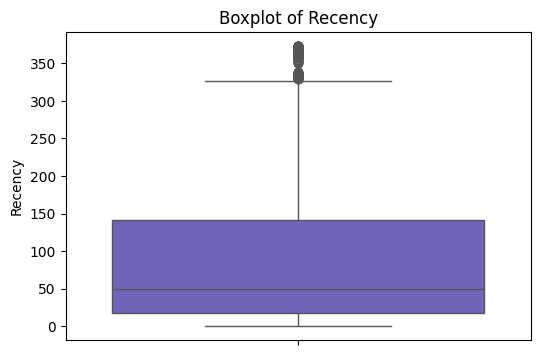

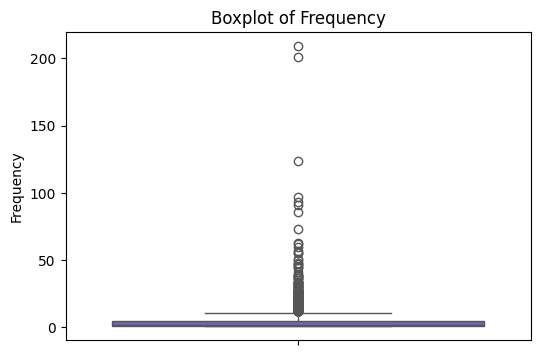

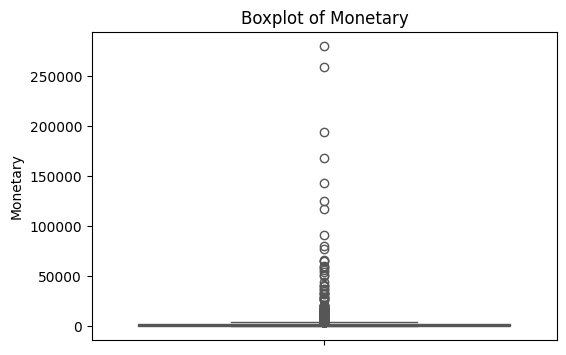

In [24]:
value = ['Recency', 'Frequency', 'Monetary']
for col in value:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=RFM[col], color='#6256CA')
    plt.title(f'Boxplot of {col}')
    plt.show()

#### **Remove outliers**

In [25]:
Recency_threshold = RFM.Recency.quantile(0.95)
Frequency_threshold = RFM.Frequency.quantile(0.95)
Monetary_threshold = RFM.Monetary.quantile(0.95)

RFM_drop_outlier = RFM[(RFM.Recency <= Recency_threshold) & (RFM.Frequency <= Frequency_threshold) & (RFM.Monetary <= Monetary_threshold)]
RFM_drop_outlier.shape
#RFM = RFM_drop_outlier

(3837, 4)

In [165]:
RFM.shape

(4338, 4)

In [26]:
RFM_drop_outlier.head()

,CustomerID,Recency,Frequency,Monetary
1,12347.0,2,7,4310.00
2,12348.0,75,4,1744.44
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
5,12352.0,36,8,2042.24


#### **Review data distribution after removing outlier**

##### **Distribution of Recency**

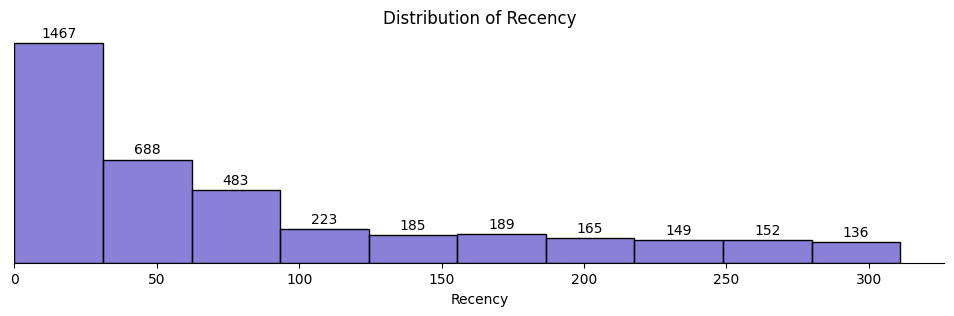

In [27]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 3))

# Plot histogram
sns.histplot(data=RFM_drop_outlier, x='Recency', bins=10, ax=ax,color='#6256CA')

# Set title and limits
ax.set_title('Distribution of Recency')
ax.set_xlim(left=0)
ax.yaxis.set_visible(False)

# Remove unnecessary spines
for spine in ['left', 'top', 'right']:
    ax.spines[spine].set_visible(False)

# Show customer count for each bin
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)

# Show plot
plt.show()

**Summary:** Overall, about 2600 customers fall into the 0-100 days recency group, making up 60% of the total customer base. This indicates that the company has a strong base of recent customers, which is a positive sign.

##### **Distribution of Frequency**

<ipython-input-28-f947bd1e48ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_drop_outlier['FrequencyGroup'] = pd.cut(RFM_drop_outlier['Frequency'], bins=binsF, labels=labelsF)


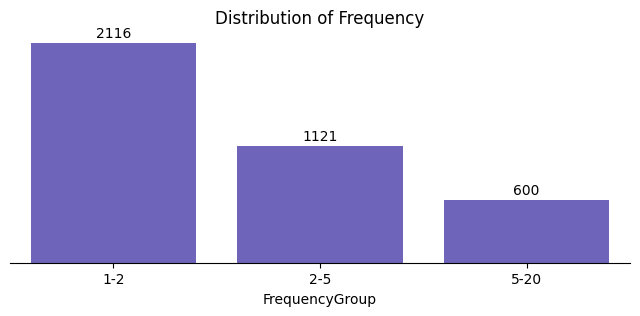

In [28]:

# Define bins and labels for Frequency grouping
binsF = [0, 2, 5, 20]
labelsF = ['1-2', '2-5', '5-20']

# Create frequency groups
RFM_drop_outlier['FrequencyGroup'] = pd.cut(RFM_drop_outlier['Frequency'], bins=binsF, labels=labelsF)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 3))

# Plot count of FrequencyGroup
sns.countplot(x='FrequencyGroup', data=RFM_drop_outlier, ax=ax, color='#6256CA')

# Set title and remove unnecessary spines
ax.set_title('Distribution of Frequency')
ax.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show count labels on bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)

plt.show()

**Summary:**
- Group 1-2 (2166 customers): Most of customers are one-time or occasional buyers. Opportunity to encourage repeat purchases through engagement strategies.
- Group 2-5 (1121 customers): Moderate group; target with loyalty programs to increase purchase frequency.
- Group 5-20 (600 customers): These customers are loyal and make multiple purchases, so focusing on retaining and rewarding them can drive more revenue.

##### **Distribution of Monetary**

<ipython-input-29-391a903545ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_drop_outlier['MonetaryGroup'] = pd.cut(RFM_drop_outlier['Monetary'], bins=binsM, labels=labelsM)


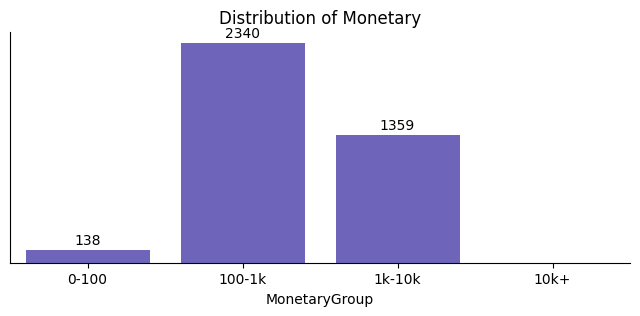

In [29]:
# Define bins and labels for Monetary grouping
binsM = [0, 100, 1000, 10000, np.inf]
labelsM = ['0-100', '100-1k', '1k-10k', '10k+']

# Create Monetary groups
RFM_drop_outlier['MonetaryGroup'] = pd.cut(RFM_drop_outlier['Monetary'], bins=binsM, labels=labelsM)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 3))

# Plot count of MonetaryGroup
sns.countplot(x='MonetaryGroup', data=RFM_drop_outlier, ax=ax, color='#6256CA')

# Set title and remove unnecessary spines
ax.set_title('Distribution of Monetary')
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show count labels on bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)

# Show plot
plt.show()

Summary:
- 60% customers spend under 1000 --> Engage with loyalty programs or personalized offers to increase spend.
- Group 1000-10000 (1359 customers): this is a significant revenue contributors --> must retain and increase value.

  #### **3.2.3 Calculate RFM Score**

In [30]:
# Calculate RFM score

RFM_drop_outlier['R_score'] = pd.qcut(RFM_drop_outlier.Recency.rank(method='first'), 5, labels=[5,4,3,2,1])
RFM_drop_outlier['F_score'] = pd.qcut(RFM_drop_outlier.Frequency.rank(method='first'), 5, labels=[1,2,3,4,5])
RFM_drop_outlier['M_score'] = pd.qcut(RFM_drop_outlier.Monetary.rank(method='first'), 5, labels=[1,2,3,4,5])
RFM_drop_outlier['RFM_Score'] = RFM_drop_outlier.R_score.astype(str) + RFM_drop_outlier.F_score.astype(str) + RFM_drop_outlier.M_score.astype(str)

RFM_drop_outlier['RFM_Score']=RFM_drop_outlier['RFM_Score'].str.strip()
RFM_drop_outlier.head()


<ipython-input-30-70eb9711d31b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_drop_outlier['R_score'] = pd.qcut(RFM_drop_outlier.Recency.rank(method='first'), 5, labels=[5,4,3,2,1])
<ipython-input-30-70eb9711d31b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_drop_outlier['F_score'] = pd.qcut(RFM_drop_outlier.Frequency.rank(method='first'), 5, labels=[1,2,3,4,5])
<ipython-input-30-70eb9711d31b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,CustomerID,Recency,Frequency,Monetary,FrequencyGroup,MonetaryGroup,R_score,F_score,M_score,RFM_Score
1,12347.0,2,7,4310.00,5-20,1k-10k,5,5,5,555
2,12348.0,75,4,1744.44,2-5,1k-10k,2,4,5,245
3,12349.0,18,1,1757.55,1-2,1k-10k,4,1,5,415
4,12350.0,310,1,334.40,1-2,100-1k,1,1,2,112
5,12352.0,36,8,2042.24,5-20,1k-10k,3,5,5,355


In [31]:
# Map RFM Score to segmentation
RFM_final = RFM_drop_outlier.merge(Segment, on='RFM_Score', how='left')
RFM_final.head()

,CustomerID,Recency,Frequency,Monetary,FrequencyGroup,MonetaryGroup,R_score,F_score,M_score,RFM_Score,Segment,RFM Score
0,12347.0,2,7,4310.00,5-20,1k-10k,5,5,5,555,Champions,"555, 554, 544, 545, 454, 455, 445"
1,12348.0,75,4,1744.44,2-5,1k-10k,2,4,5,245,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
2,12349.0,18,1,1757.55,1-2,1k-10k,4,1,5,415,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
3,12350.0,310,1,334.40,1-2,100-1k,1,1,2,112,Lost customers,"111, 112, 121, 131,141,151"
4,12352.0,36,8,2042.24,5-20,1k-10k,3,5,5,355,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"


## **4. VISUALIZATION**

### **4.1 Number customer for each Segmentation**

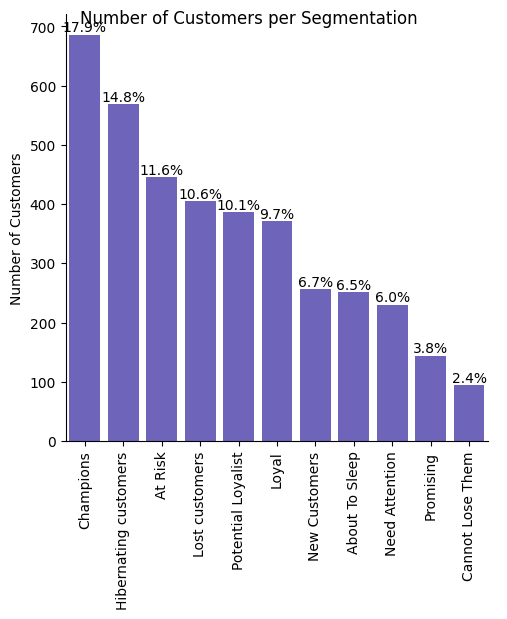

In [39]:

# Calculate percentage of customers in each segment
segment_counts = RFM_final['Segment'].value_counts()
segment_percentage = (segment_counts / segment_counts.sum()) * 100

# Create the count plot
g = sns.catplot(
    x='Segment',
    data=RFM_final,
    kind='count',
    color='#6256CA',
    order=segment_counts.index
)

plt.xlabel('')
plt.ylabel('Number of Customers')
g.fig.suptitle('Number of Customers per Segmentation')

# Annotate each bar with percentage values
for ax in g.axes.flat:
    for p, percentage in zip(ax.patches, segment_percentage):
        ax.text(
            p.get_x() + p.get_width() / 2,
            p.get_height(),
            f'{percentage:.1f}%',  # Show percentage on bars
            ha='center',
            va='bottom'
        )

g.set_xticklabels(rotation=90)
plt.show()

**Summary:**
- The company's largest customer segment, "Champions" (17.9%) is a positive indicator, as these customers are highly loyal, engage in frequent transactions, and contribute significantly to sales.
- However, a substantial portion of the customer base falls within the "Hibernating," "At Risk," and "Lost Customers" groups (36%), presenting a significant challenge. Without a targeted marketing strategy to re-engage these customers, the company's business performance may be severely impacted.

<Figure size 1000x600 with 0 Axes>

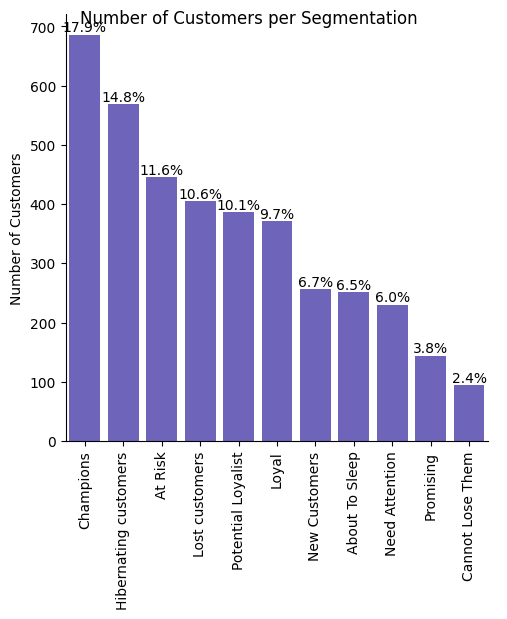

In [43]:
# Calculate percentage of customers in each segment
segment_counts = RFM_final['Segment'].value_counts()
segment_percentage = (segment_counts / segment_counts.sum()) * 100

# Create the count plot
plt.figure(figsize=(10, 6))
g = sns.catplot(x='Segment', data=RFM_final, kind='count', color='#6256CA', order=segment_counts.index)
plt.xlabel('')
plt.ylabel('Number of Customers')
g.fig.suptitle('Number of Customers per Segmentation')

# Annotate each bar with percentage values
for ax in g.axes.flat:
    for p, percentage in zip(ax.patches, segment_percentage):
        ax.text(
            p.get_x() + p.get_width() / 2,
            p.get_height(),
            f'{percentage:.1f}%',  # Show percentage on bars
            ha='center',
            va='bottom'
        )

g.set_xticklabels(rotation=90)
plt.show()

### **4.2 Average spending per customer for each Segmentation**

#### **Calculate Average spending per customer**

In [49]:
# Calculate total spending per segment
segment_by_spending = RFM_final.groupby('Segment', as_index=False)['Monetary'].sum()

# Count number of customers per segment
segment_by_usercount = RFM_final.groupby('Segment', as_index=False)['CustomerID'].count()

# Merge both dataframes
segment_add = segment_by_spending.merge(segment_by_usercount, on='Segment', how='left')

# Calculate average spending per customer
segment_add['avg_spend_per_customer'] = segment_add['Monetary'] / segment_add['CustomerID']
segment_add = segment_add.sort_values('avg_spend_per_customer')



#### **Create bar plot**

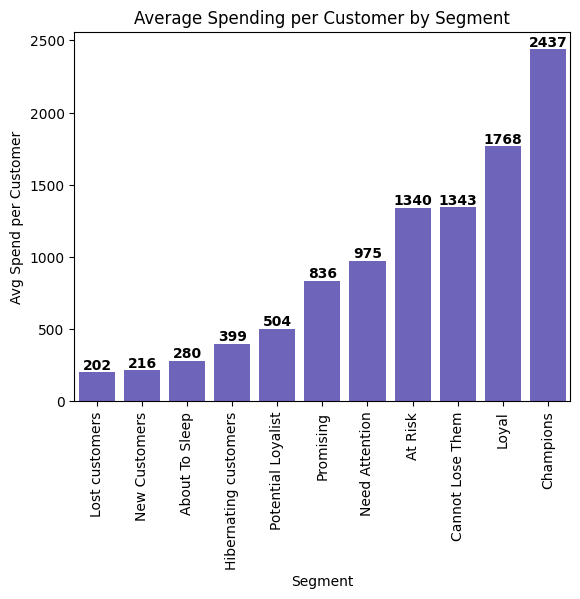

In [54]:
# Create bar plot
g = sns.barplot(x='Segment', y='avg_spend_per_customer', data=segment_add, order=segment_add['Segment'], color='#6256CA')

# Add numbers on each bar (rounded to 0 decimal places)
for p in g.patches:
    g.annotate(
        f'{p.get_height():.0f}',  # Rounded to 0 decimal places
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Add title and labels
g.set_title('Average Spending per Customer by Segment')
plt.xticks(rotation=90)
plt.ylabel('Avg Spend per Customer')

# Show the plot
plt.show()

**Summary:**

- The average spending per customer is highest for the "Champions," "Loyal," "At Risk," and "Cannot Lose" segments.
- The number of customers in the "Cannot Lose Them" segment is the smallest, but their contribution to revenue is extremely high.
- Although the number of customers in the "Hibernating Customers" and "Lost Customers" segments is significant, their average spending is lower than expected.







#### **Recomendation**:
Action: launch cross-sale campaigns, targeting to customers is these groups.

Action:
Implement promotion campaigns for At Risk segmentation to make them more engaged.
Implement premium customer service for Cannot Lose Them to increase their loyalty.